#Implementación de K-Means

TC1002

Barbara Nicole Vidal Sandoval | A01635233

Misael Octavio Rodríguez Macías | A01639786

Daniel Alejandro Flores García | A00831637

https://github.com/daniel-floga/TC1002S_semanaTec/tree/main/retoAnalitica


*   Importamos libreías necesarias 
*   Leemos el archivo de base de datos y desplegamos a pantalla

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv('/content/01.07.2022_da_hospitalizados_covid19 (1) (1).csv')
df.head(5)

,Fecha,Institución,Pacientes,Positivos,En_estudio
0,1,SSJ,0,0,0
1,2,HCG,2,0,2
2,3,ISSSTE,0,0,0
3,4,IMSS,0,0,0
4,5,Privados,0,0,0




*   Desplegamos a pantalla información general de nuestra base de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha        998 non-null    int64 
 1   Institución  998 non-null    object
 2   Pacientes    998 non-null    int64 
 3   Positivos    998 non-null    int64 
 4   En_estudio   998 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 39.1+ KB




*   Utilizamos la función describe para obtener nuestro análisis matemático



In [ ]:
df.describe()

,Fecha,Pacientes,Positivos,En_estudio
count,998.000000,998.000000,998.000000,998.000000
mean,499.500000,101.715431,53.688377,47.958918
std,288.242086,141.466588,76.991970,70.211297
min,1.000000,0.000000,0.000000,0.000000
25%,250.250000,15.000000,4.000000,10.000000
50%,499.500000,55.000000,26.000000,20.500000
75%,748.750000,99.000000,59.000000,48.000000
max,998.000000,568.000000,389.000000,357.000000




*   Eliminamos la columna de fecha, ya que la consideramos innecesaria nuestro análisis  específico, no aporta ningún dato númerico relevante por ahora.


In [ ]:
df = df.drop('Fecha', axis=1)
df.head(5)

,Institución,Pacientes,Positivos,En_estudio
0,SSJ,0,0,0
1,HCG,2,0,2
2,ISSSTE,0,0,0
3,IMSS,0,0,0
4,Privados,0,0,0




*   Comenzamos a graficar las variables númericas con respecto a las instituciones que existen en nuestra base de datos.

Text(0.5, 1.05, 'Distribución de las variables numéricas por género')

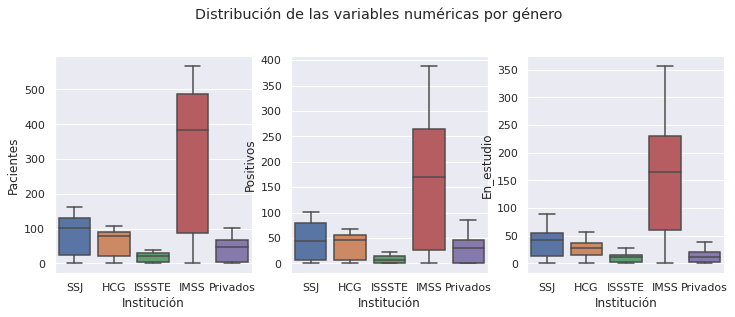

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))


# Graficamos los tres boxplot en una sola imagen.

sns.boxplot(data=df, y = 'Pacientes', x='Institución',ax=axs[0])
sns.boxplot(data=df, y = 'Positivos', ax=axs[1], x='Institución')
sns.boxplot(data=df, y = 'En_estudio', ax=axs[2], x='Institución')

# Esta opción es para que se ajusten las imágenes a la cuadrícula
#plt.tight_layout()

# Esta opción es para poner un título general para las tres gráficas
plt.suptitle('Distribución de las variables numéricas por Institución', y=1.05)



*   Realizamos el análisis de correlación mediante graficación.



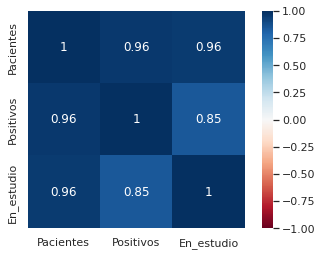

In [ ]:
df_corr = df.corr()
sns.heatmap(data=df_corr, vmin=-1, vmax = 1, cmap='RdBu', annot=True, square=True)


*   Gráfica de dispersión 

Text(0.5, 1.05, 'Gráfico')

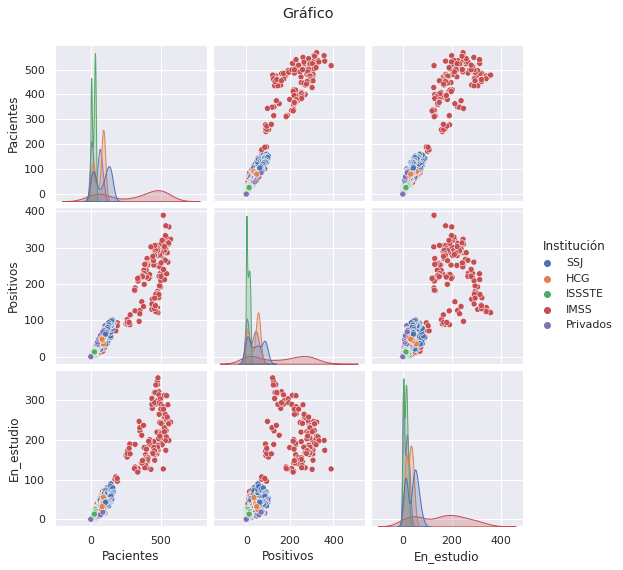

In [ ]:
sns.pairplot(data=df, hue='Institución')
plt.suptitle('Gráfico', y=1.05)

- Normalizamos los datos para poder sacar los centroides

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Pacientes', 'Positivos','En_estudio']
X = df.loc[:, numeric_cols]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,Pacientes,Positivos,En_estudio
0,-0.719367,-0.697674,-0.683408
1,-0.705223,-0.697674,-0.654908
2,-0.719367,-0.697674,-0.683408
3,-0.719367,-0.697674,-0.683408
4,-0.719367,-0.697674,-0.683408


- Importamos las librerias para poder calcular 'k' con los métodos del codo y la silueta.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0.5, 1.0, 'Silhouette Score')

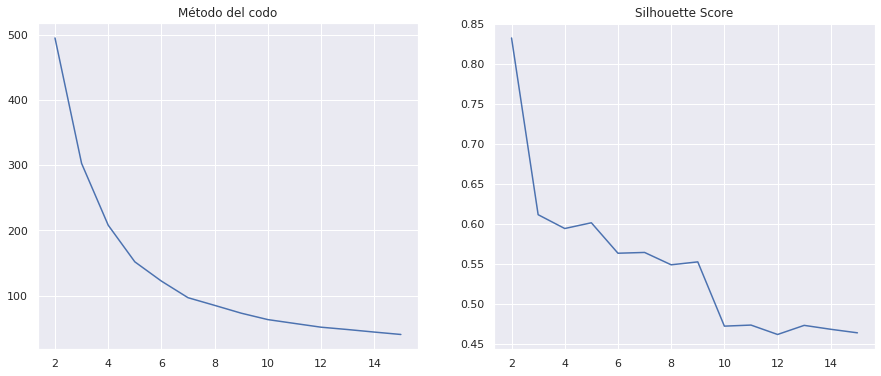

In [ ]:
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

- Acomodamos los datos en 6 grupos dependiendo de los centroides.

In [ ]:
model = KMeans(n_clusters=6, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
df['Grupo'] = clusters.astype('str')
df.head()

,Institución,Pacientes,Positivos,En_estudio,Grupo
0,SSJ,0,0,0,0
1,HCG,2,0,2,0
2,ISSSTE,0,0,0,0
3,IMSS,0,0,0,0
4,Privados,0,0,0,0


- Relacionamos los datos por dispersion en dos dimensiones 

Text(0.5, 1.05, '6 grupos de clientes')

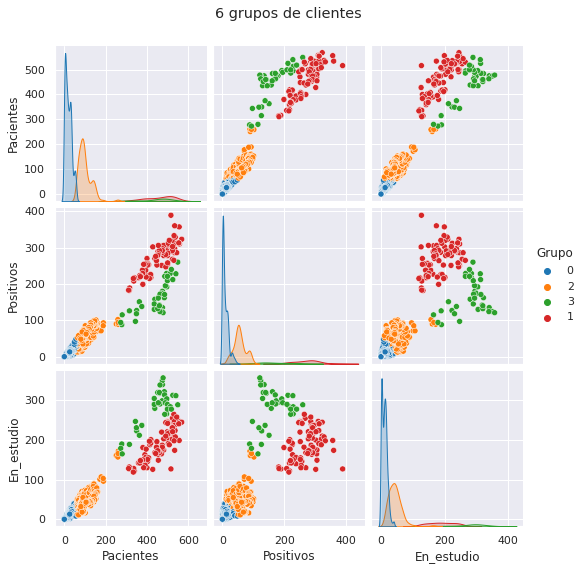

In [ ]:
sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('6 grupos de clientes', y=1.05)

- Con la libreria de plotly graficamos por dispersión en 3 dimensiones con los grupos ya definidos.

In [ ]:
import plotly.express as px

# Creamos la figura donde graficaremos
fig = px.scatter_3d(df, x = 'Pacientes', y = 'Positivos', 
                    z = 'En_estudio', 
                    title='6 grupos de Pacientes',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

# mostramos la imagen
fig.show()

- Sacamos el análisis estadístico por grupos.

In [ ]:
df.groupby('Grupo').mean()

,Pacientes,Positivos,En_estudio
Grupo,,,
0,16.162447,6.569620,9.459916
1,351.891892,190.432432,161.459459
2,79.591973,45.541806,34.033445
3,501.322034,292.237288,209.084746
4,471.466667,172.166667,299.300000
5,134.454545,74.717172,59.737374


In [ ]:
df.groupby('Grupo').std()

,Pacientes,Positivos,En_estudio
Grupo,,,
0,12.855720,7.133609,7.750024
1,51.847953,58.249244,29.214337
2,15.223858,14.035218,14.255302
3,35.423273,27.994050,35.025748
4,40.033377,40.206436,27.842104
5,17.198880,16.393777,15.549517


#¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- Si, ya que la segmentación de datos se presenta de una manera bastante clara, en la que la relación de datos se ve reflejada en cada grupo.
#¿Cómo obtuviste el valor de k a usar?
-Al usar el método del codo y de la silueta, podemos obtener cada centroide dependiendo de los grupos que hayamos generado que en este caso fueron 6, después, generamos las gráficas para observar el resultado con estos valores de k.
#¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- Nosotros lo que hicimos fue evaluar que al usar menos o más grupos los valores se disparaban y tenían mucho menos sentido que el primero que usamos, al hacer esto nos dimos cuenta que nuestro valor fue el indicado.
#¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?
- Si, los grupos 0, 2 y 5 se encuentran muy cerca en la gráfica. Los demás se encuentran a mas o menos 50 unidades de distancia en el eje de las x (Pacientes).
#¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
- Se veria reflejado como una gráfica con una caja pequeñ y unos bigotes mas grandes.
#¿Qué puedes decir de los datos basándose en los centros?
- Que se encuentran bastanate relacionados los grupos con sus respectivos datos, hay una buena correlación ya que la segmentación resulta lógica al analizarla.